In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import itertools
from collections import Counter
from networkx.drawing.nx_agraph import graphviz_layout
from skbio.stats.composition import ilr
from skbio.stats.composition import clr
from skbio.stats.composition import multiplicative_replacement
import seaborn as sns
from matplotlib import rcParams
sns.set()
sns.set(font_scale=1.5)

In [2]:
def pullPrevalence(df, cohortname, taxlevel):
    taxHead = str('Bacterial_'+taxlevel)
    tempdic ={taxHead:[], 'Prevalence':[], 'diagnosis':[]}
    
    df2 = df[df['diagnosis']==cohortname].copy()
    df2.replace(0.0, np.nan, inplace=True)
    df2.drop(columns=['diagnosis'], inplace=True)
    df2.dropna(axis=1,thresh=1, inplace=True)
    
    for column in df2.columns:
        tempdic['Prevalence'].append(len(df2[column].dropna())/df2.shape[0])
        tempdic[taxHead].append(column)
        tempdic['diagnosis'].append(cohortname)
        
    tempdf = pd.DataFrame(data=tempdic)
    return(tempdf)

In [3]:
def pullPrevalenceAbundance(df, cohortname, taxlevel):
    taxHead = str('Bacterial_'+taxlevel)
    tempdic ={taxHead:[], 'Prevalence':[], "Mean_Relative_Abundance":[], 'diagnosis':[]}
    
    df2 = df[df['diagnosis']==cohortname].copy()
    df2.replace(0.0, np.nan, inplace=True)
    df2.drop(columns=['diagnosis'], inplace=True)
    df2.dropna(axis=1,thresh=1, inplace=True)
    
    for column in df2.columns:
        tempdic['Prevalence'].append(len(df2[column].dropna())/df2.shape[0])
        tempdic[taxHead].append(column)
        tempdic['diagnosis'].append(cohortname)
        tempdic['Mean_Relative_Abundance'].append(df2[column].mean())
        
    tempdf = pd.DataFrame(data=tempdic)
    return(tempdf)

In [4]:
df = pd.read_csv('data/genus-normalized-table.csv', header=0)
# df['diagnosis'] = [1 if x=='SZ' else 0 for x in df['diagnosis']]
# df = df.drop(['sampleid'], axis=1)
prev0 = pullPrevalence(df,0,'Genus')
prev1 = pullPrevalence(df,1,'Genus')
allPrev = pd.concat([prev0,prev1]).set_index('Bacterial_Genus')

In [5]:
prev0A = pullPrevalenceAbundance(df,0,'Genus')
prev1A = pullPrevalenceAbundance(df,1,'Genus')
allPrevA = pd.concat([prev0A, prev1A]).set_index('Bacterial_Genus')

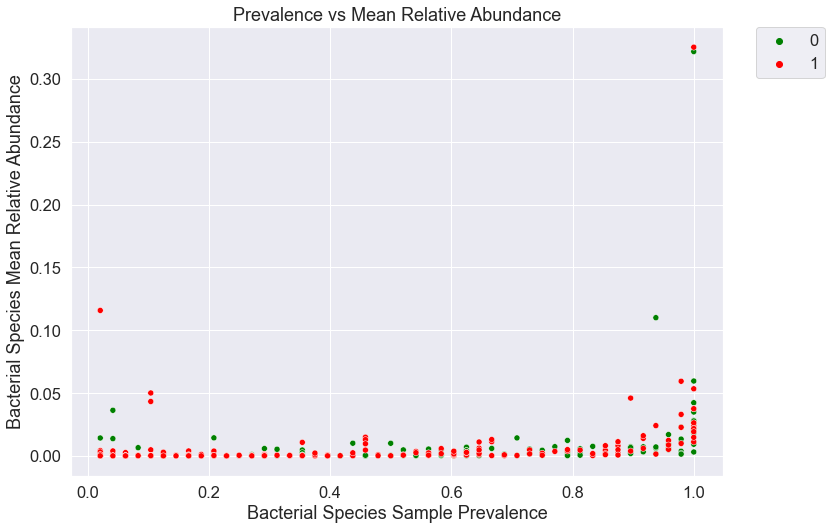

In [6]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
sns.set()
sns.set(font_scale=1.5)
palette ={0:'green', 1:'red'}
sns.scatterplot(data=allPrevA, x='Prevalence', y='Mean_Relative_Abundance', hue='diagnosis', palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Prevalence vs Mean Relative Abundance')
plt.xlabel('Bacterial Species Sample Prevalence')
plt.ylabel('Bacterial Species Mean Relative Abundance')
plt.show()

c:\Users\sdwan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\sdwan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


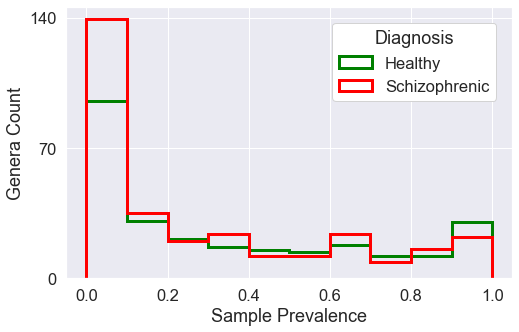

In [19]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,5
rcParams['font.size'] = 18

for d in set(allPrevA['diagnosis']):
    subset = allPrevA[allPrevA['diagnosis'] == d].copy()
    sns_hist = sns.distplot(subset['Prevalence'], color=palette[d] ,hist = True, kde = False, bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], label = d, hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1})
    
# Plot formatting
plt.xlabel('Sample Prevalence')
plt.ylabel('Genera Count')
plt.yticks([0, 70, 140])
plt.legend(['Healthy', 'Schizophrenic'], loc=1, borderaxespad=1,framealpha=1, edgecolor='lightgrey', facecolor='white', title='Diagnosis')
fig = sns_hist.get_figure()
prevalenceFigure=fig
prevalenceFigure.savefig("prevalence.tiff", dpi=300, facecolor='white')
plt.show()